### Average over multiple runs  - Phase or amplirude noise -  Method 1
Plot the emittance growth in the presence of phase noise - PN. The simulation for each set of parameters is repeated multiple times. The mean and the standard deviation of the emittance values are computed over all runs (part 3) for each turn. The normalised emittance is used here. 

In [1]:
import sys
sys.path.append('../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
import csv
import numpy as np
import pickle
import matplotlib.pyplot as plt

#### Plotting paramerters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data folder

b) Load the values of the transverse emittances in lists.

In [9]:
n_runs = 1 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 

In [118]:
# variable of iteration
my_variables = np.arange(100000, 600000, 100000)
print(my_variables)
titleLegend = 'macroparticles'

[100000 200000 300000 400000 500000]


In [113]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
#study_name = 'sps_270GeV_noCC_1e5turns_1e5Nb_wakefields_slices_'
study_name = 'sps_270GeV_noCC_1e5turns_1e5Nb_wakefields_slices50_'
noise_type = 'PN'
#PN_name_template = '{}_myteest'.format(type_of_noise)

In [114]:
ex_dict, ey_dict = {}, {} # type: dictionary
meanX_dict, meanY_dict = {}, {}


for var in my_variables:
    for run in range(n_runs):
        print(var, run)
        temp_name = f'{var}_run{run}' # the suffix of the name of the current study
        # A. load the turn by turn data in a dictionary
        meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+f'{study_name}{var}_run{run}/file.txt', delimiter = ",", unpack = True)
        # B. Create a different list for each run and save the emittance values
        ex_dict[temp_name] = emitX 
        ey_dict[temp_name] = emitY
        meanX_dict[temp_name] =  meanX 
        meanY_dict[temp_name] = meanY
        
        

100000 0
200000 0
300000 0
400000 0
500000 0


#### 2) Here the mean and the standard deviation of the emittance values are computed over all runs. 

In [115]:
ex_mean, ey_mean = {}, {}
ex_std, ey_std = {}, {}

n_saved_turns = int(n_turns/decTurns)

for var in my_variables:
    ex_mean[f'{var}'], ey_mean[f'{var}']  = [], []
    ex_std[f'{var}'], ey_std[f'{var}'] = [], []
  
    for turn in range(n_saved_turns):
        ex_temp = []
        ey_temp = []

        # keep all the emittance values for all the runs
        for run in range(n_runs):
            #temp_name = 'run{}'.format(run+1)
            temp_name = f'{var}_run{run}' 
            ex_temp.append(ex_dict[temp_name][turn])
            ey_temp.append(ey_dict[temp_name][turn])
        # calculate and append the mean of the emittance value for every turn
        ex_mean[f'{var}'].append(np.mean(ex_temp))
        ey_mean[f'{var}'].append(np.mean(ey_temp))
        # calculate and append the standard deviation of the emittance value for every turn
        ex_std[f'{var}'].append(np.std(ex_temp))
        ey_std[f'{var}'].append(np.std(ey_temp))    

#### 3) Convert turns to time [s]

In [116]:
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

#### 4) Plot evolution of the normalised vertical emittance for all study cases

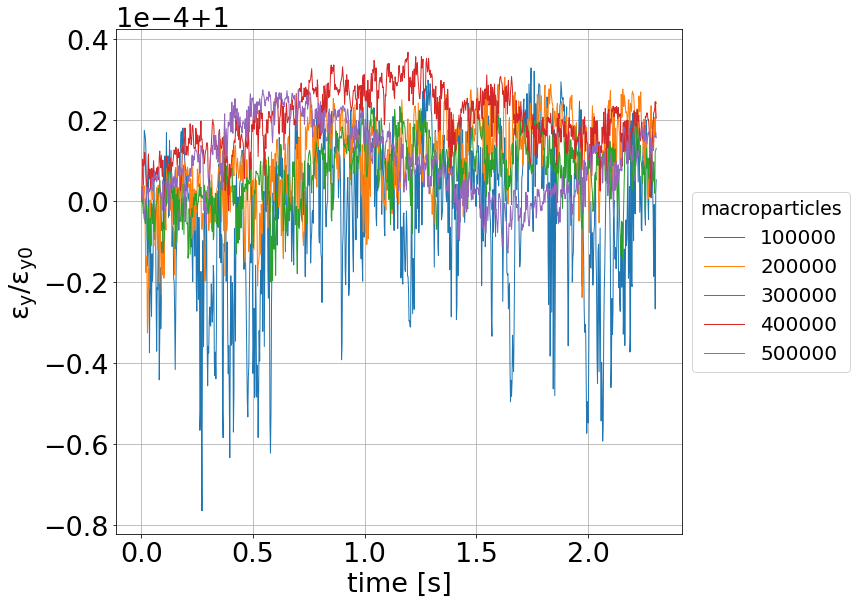

In [119]:
fig = plt.figure(figsize=(12, 8.5))
for var in my_variables:
    plt.plot(tspan, np.array(ey_mean[f'{var}'])/np.array(ey_mean[f'{var}'][0]), label=f'{var}')    
      
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('time [s]')
plt.ylabel(r'$\mathrm{\epsilon_y / \epsilon_{y0}}$')

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=titleLegend, title_fontsize=19)

plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/dey_{study_name}_{noise_type}_runs{n_runs}_iterateSlices.png')

### 6) Plot evolution of the normalised horizontal emittance

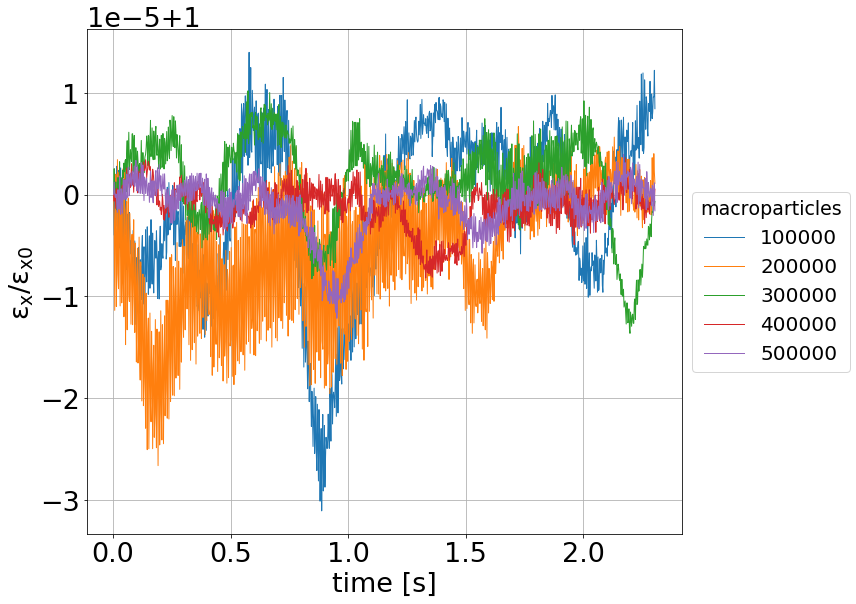

In [120]:
fig = plt.figure(figsize=(12, 8.5))
for var in my_variables:
    plt.plot(tspan, np.array(ex_mean[f'{var}'])/np.array(ex_mean[f'{var}'][0]), label=f'{var}')    
      
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('time [s]')
plt.ylabel(r'$\mathrm{\epsilon_x / \epsilon_{x0}}$')

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=titleLegend, title_fontsize=19)

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#ncol=3, fancybox=True, shadow=True)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/dex_{study_name}_{noise_type}_runs{n_runs}_iterateSlices.png')

### 8)  Evolution of the centroid - vertical plane

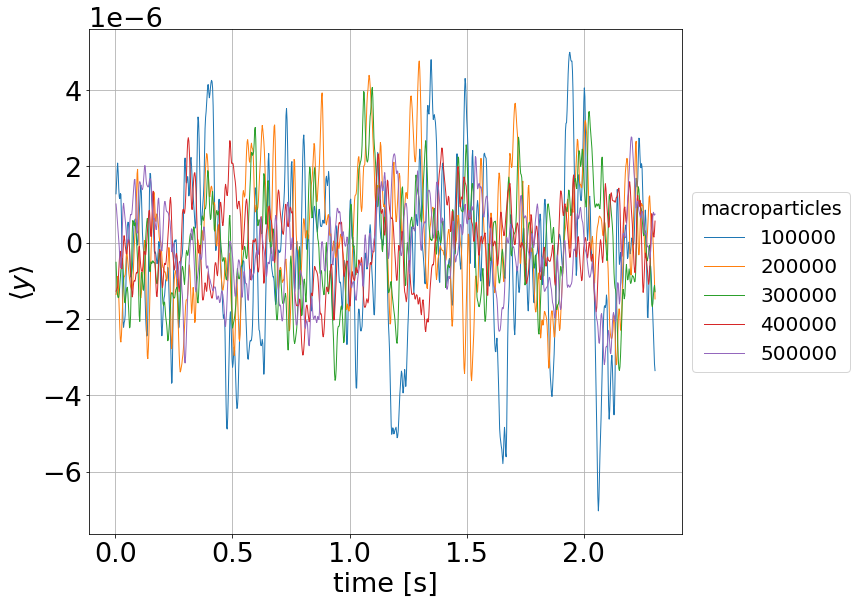

In [124]:
fig = plt.figure(figsize=(12, 8.5))
for var in my_variables:
    for run in range(n_runs):
        temp_name = f'{var}_run{run}' # the suffix of the name of the current study
        # A. load the turn by turn data in a dictionary
        plt.plot(tspan, np.array(meanY_dict[temp_name]), label=f'{var}')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('time [s]')
plt.ylabel(r'$\langle y \rangle$')

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=titleLegend, title_fontsize=19)

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#ncol=3, fancybox=True, shadow=True)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/meanY_{study_name}_{noise_type}_runs{n_runs}_iterate{titleLegend}.png')

### 9) Evolution of the centroid - horizontal plane

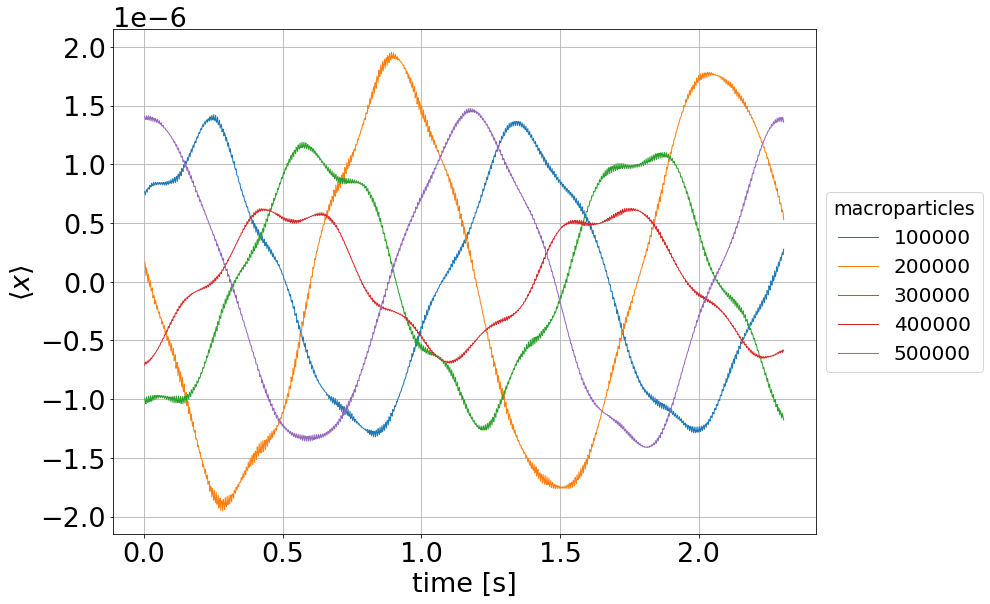

In [129]:
fig = plt.figure(figsize=(13.5, 8.5))
for var in my_variables:
    for run in range(n_runs):
        temp_name = f'{var}_run{run}' # the suffix of the name of the current study
        # A. load the turn by turn data in a dictionary
        plt.plot(tspan, np.array(meanX_dict[temp_name]), label=f'{var}')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('time [s]')
plt.ylabel(r'$\langle x \rangle$')

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=titleLegend, title_fontsize=19)

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#ncol=3, fancybox=True, shadow=True)
plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig(f'./output/meanX_{study_name}_{noise_type}_runs{n_runs}_iterate{titleLegend}.png')

#### 6) Plot evolution of the standard deviation $\sigma$ of the emittance values (in the vertical plane)

No handles with labels found to put in legend.


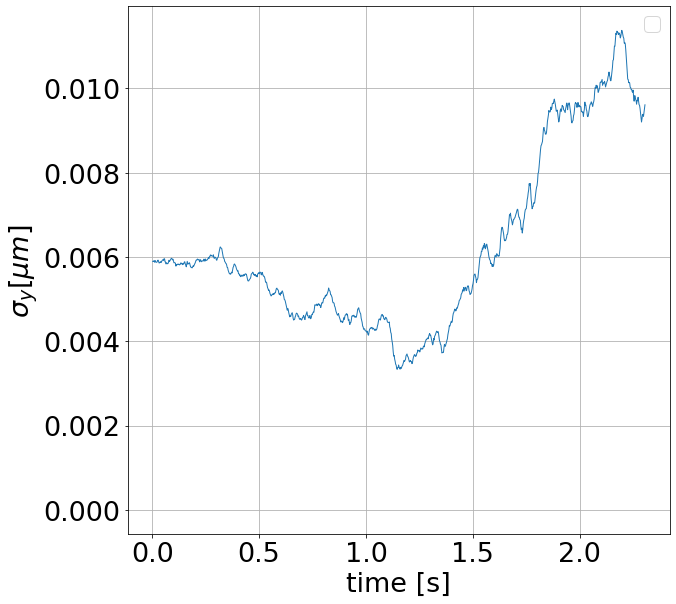

In [75]:
plt.plot(tspan, np.array(ey_std_pn)*1e6, c='C0')   
plt.plot(0,0,c='C0',  linewidth = 3)   
plt.xlabel('time [s]')
plt.ylabel(r'$\sigma_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_std_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 7) Calculate the emittance growth rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 
- V plane only

In [76]:
# linear fit
[m_pn, b_pn], cov_pn = np.polyfit(tspan, ey_mean_pn, 1, cov=True)
# compute the error of the gradient of the fit slope
err_pn = np.sqrt(np.diag(cov_pn))

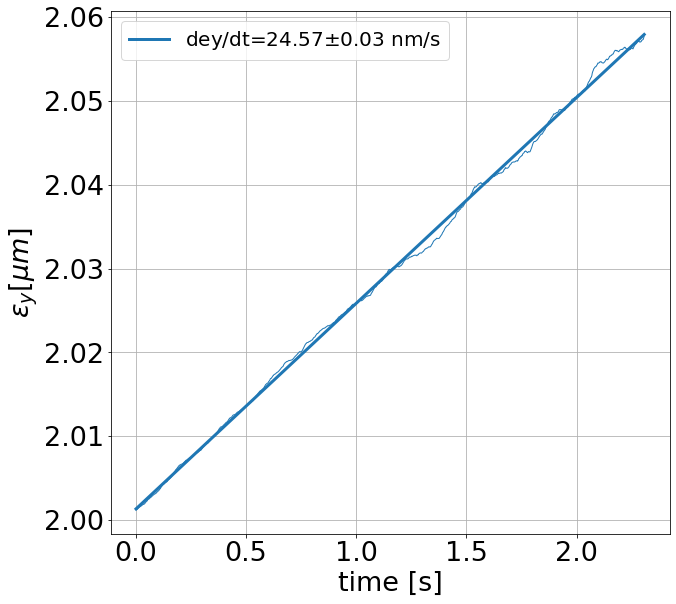

In [77]:
plt.plot(tspan, np.array(ey_mean_pn)*1e6, c='C0')
plt.plot(tspan, (m_pn*tspan+b_pn)*1e6, c = 'C0', label='dey/dt={0:.2f}'.format(m_pn*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_pn[0]*1e9), linewidth = 3)

plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_rate_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

### 8) Compute the theoretically expected rate

In [78]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
sigma_z = 0.155 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = 3.99e-11 #(A_amplitude * scale_factor)**2/frev # V^2/Hz
print(PSD_phi, PSD_A)

1.6806723392287607e-10 3.99e-11


In [79]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5168486015622045, CDeltaA = 0.24157569921889774
expected growth = 23.813362141833874 nm/s


#### 8) Plot fill between

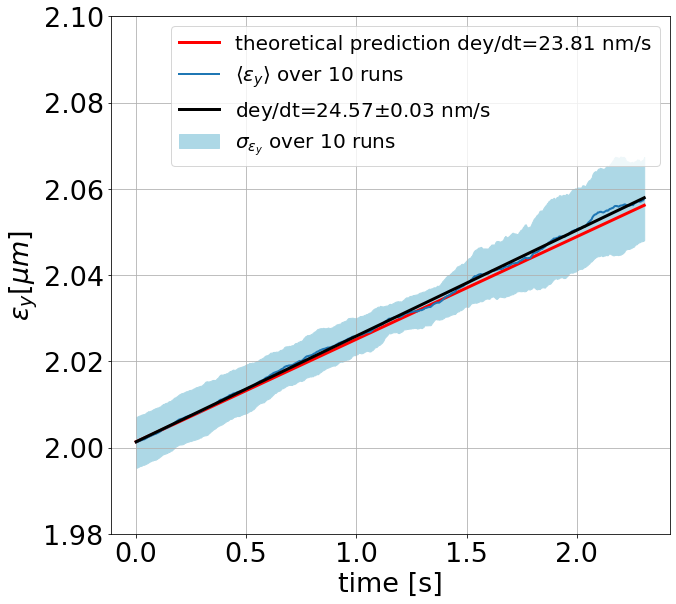

In [80]:
# std over all runs
plt.fill_between(tspan, np.array(ey_mean_pn)*1e6 - np.array(ey_std_pn)*1e6, np.array(ey_mean_pn)*1e6 + np.array(ey_std_pn)*1e6, color=fill_bewtween_color, label=r'$\sigma_{\epsilon_y} $'+' over {} runs'.format(n_runs))

# expected slope from analytical calculations
plt.plot(tspan, (expected_growth*tspan+b_pn)*1e6, c='r', linewidth=3, label= 'theoretical prediction dey/dt={0:.2f} nm/s'.format(expected_growth*1e9))

# emittance values obtained from the simulation averaged over turns
plt.plot(tspan, np.array(ey_mean_pn)*1e6, c=my_color, linewidth=2, label=r'$\langle \epsilon_y \rangle $'+' over {} runs'.format(n_runs))

# linear fit on the emittance values obtained from the simulation averaged over turn
plt.plot(tspan, (m_pn*tspan+b_pn)*1e6, c = 'k', label='dey/dt={0:.2f}'.format(m_pn*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_pn[0]*1e9), linewidth = 3)




plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.ylim(1.98, 2.10) #2.26
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('./output/V_emittance_growth_rate_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_{}turns_mean{}run_fill_between.png'.format(type_of_noise, n_turns, n_runs))

#### B) y axis: emittance values after substracting the initial emittance

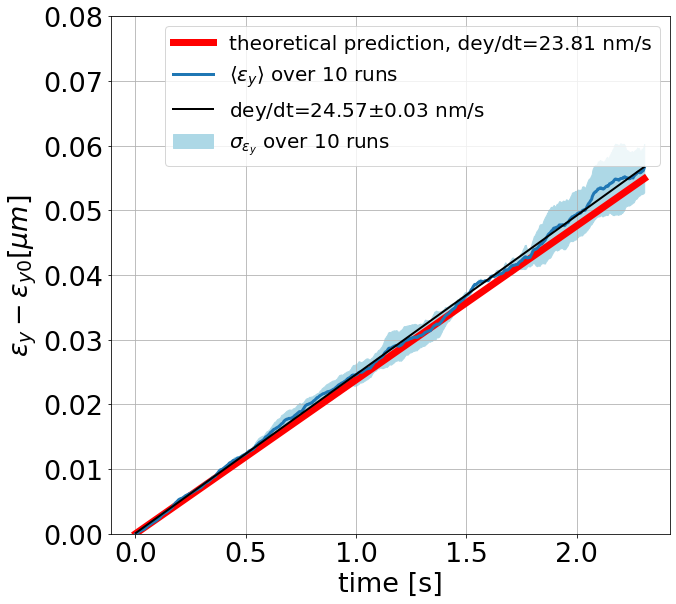

In [82]:
initial_std = ey_std_pn[0]
initial_mean_emittance = ey_mean_pn[0]
# std over all runs
plt.fill_between(tspan, np.array(ey_mean_pn-initial_mean_emittance )*1e6 - np.array(ey_std_pn-initial_std)*1e6, np.array(ey_mean_pn-initial_mean_emittance)*1e6 + np.array(ey_std_pn-initial_std)*1e6, color=fill_bewtween_color, label=r'$\sigma_{\epsilon_y}$'+ ' over {} runs'.format(n_runs))

# expected slope from analytical calculations
plt.plot(tspan, (expected_growth*tspan)*1e6, c='r', linewidth=7, label='theoretical prediction, dey/dt={0:.2f} nm/s'.format(expected_growth*1e9))

# emittance values obtained from the simulation averaged over turns
plt.plot(tspan, np.array(ey_mean_pn-initial_mean_emittance)*1e6, c=my_color, linewidth=3, label=r'$\langle \epsilon_y \rangle $'+' over {} runs'.format(n_runs))

# linear fit on the emittance values obtained from the simulation averaged over turns
plt.plot(tspan, (b_pn-initial_mean_emittance)*1e6+(m_pn*tspan)*1e6, c = 'k', label='dey/dt={0:.2f}'.format(m_pn*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_pn[0]*1e9), linewidth = 2)



plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y - \epsilon_{y0} [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.ylim(0,0.08) # 0.3
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('./output/V_emit_growth_rate_substract_initial_emittance_270GeV_SPS_noCC_{}1e-8_VRF5_088MV_1e5Nb_{}turns_mean{}run_fill_between_fit.png'.format(type_of_noise, n_turns, n_runs))

#### Option for saving the turn by turn emittance values

In [93]:
save_data = True
if save_data:
    my_ey = {'turn':list(np.arange(n_turns)), 'Qy':ey_mean_pn}
    pickle.dump(my_ey, open('./output/tbt_ey_{}_turns{}.pkl'.format(type_of_noise, n_turns), 'wb'))